<a href="https://colab.research.google.com/github/typjohnson/LR_TPJ/blob/main/LR_Practice.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# In-Class Assignment: Exploring Regression Techniques
Objective:
The goal of this assignment is to apply five regression techniques—Multiple Linear Regression (MLR), Stochastic Gradient Descent (SGD), Ridge Regression, Lasso Regression, and Polynomial Regression—on a from Kaggle. You will compare the performance of these models and interpret the results.
https://www.kaggle.com/datasets/CooperUnion/cardataset

### Import necessary libraries

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
# Load a dataset
data = pd.read_csv("/content/drive/MyDrive/CS430/Practice Assignment 1/data.csv")

In [ ]:
# Check data
data.head()

,Make,Model,Year,Engine Fuel Type,Engine HP,Engine Cylinders,Transmission Type,Driven_Wheels,Number of Doors,Market Category,Vehicle Size,Vehicle Style,highway MPG,city mpg,Popularity,MSRP
0,BMW,1 Series M,2011,premium unleaded (required),335.0,6.0,MANUAL,rear wheel drive,2.0,"Factory Tuner,Luxury,High-Performance",Compact,Coupe,26,19,3916,46135
1,BMW,1 Series,2011,premium unleaded (required),300.0,6.0,MANUAL,rear wheel drive,2.0,"Luxury,Performance",Compact,Convertible,28,19,3916,40650
2,BMW,1 Series,2011,premium unleaded (required),300.0,6.0,MANUAL,rear wheel drive,2.0,"Luxury,High-Performance",Compact,Coupe,28,20,3916,36350
3,BMW,1 Series,2011,premium unleaded (required),230.0,6.0,MANUAL,rear wheel drive,2.0,"Luxury,Performance",Compact,Coupe,28,18,3916,29450
4,BMW,1 Series,2011,premium unleaded (required),230.0,6.0,MANUAL,rear wheel drive,2.0,Luxury,Compact,Convertible,28,18,3916,34500


## What are the basic properties of the dataset

- What is the shape of the dataset (number of rows and columns)?
- What are the column names, and what do they represent?
- What is the data type of each column?

In [ ]:
data.shape

(11914, 16)

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11914 entries, 0 to 11913
Data columns (total 16 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Make               11914 non-null  object 
 1   Model              11914 non-null  object 
 2   Year               11914 non-null  int64  
 3   Engine Fuel Type   11911 non-null  object 
 4   Engine HP          11845 non-null  float64
 5   Engine Cylinders   11884 non-null  float64
 6   Transmission Type  11914 non-null  object 
 7   Driven_Wheels      11914 non-null  object 
 8   Number of Doors    11908 non-null  float64
 9   Market Category    8172 non-null   object 
 10  Vehicle Size       11914 non-null  object 
 11  Vehicle Style      11914 non-null  object 
 12  highway MPG        11914 non-null  int64  
 13  city mpg           11914 non-null  int64  
 14  Popularity         11914 non-null  int64  
 15  MSRP               11914 non-null  int64  
dtypes: float64(3), int64(5

### Missing Data
- Are there any missing values in the dataset?
- Which columns have missing values, and how many?

In [ ]:
data.isna().sum()

,0
Make,0
Model,0
Year,0
Engine Fuel Type,3
Engine HP,69
Engine Cylinders,30
Transmission Type,0
Driven_Wheels,0
Number of Doors,6
Market Category,3742


In [ ]:
data.sample(10)

,Make,Model,Year,Engine Fuel Type,Engine HP,Engine Cylinders,Transmission Type,Driven_Wheels,Number of Doors,Market Category,Vehicle Size,Vehicle Style,highway MPG,city mpg,Popularity,MSRP
3976,Hyundai,Entourage,2008,regular unleaded,250.0,6.0,AUTOMATIC,front wheel drive,4.0,NaN,Midsize,Passenger Minivan,23,16,1439,29895
339,Nissan,370Z,2016,premium unleaded (required),332.0,6.0,MANUAL,rear wheel drive,2.0,High-Performance,Compact,Coupe,26,18,2009,37970
3268,Cadillac,CTS,2016,regular unleaded,335.0,6.0,AUTOMATIC,rear wheel drive,4.0,"Luxury,High-Performance",Large,Sedan,30,20,1624,62685
9624,Chevrolet,Silverado 1500,2017,flex-fuel (unleaded/E85),285.0,6.0,AUTOMATIC,rear wheel drive,4.0,Flex Fuel,Large,Extended Cab Pickup,24,18,1385,33445
5110,Infiniti,G Sedan,2012,premium unleaded (recommended),328.0,6.0,AUTOMATIC,rear wheel drive,4.0,"Luxury,Performance",Midsize,Sedan,27,19,190,36900
2151,Dodge,Caliber,2010,regular unleaded,172.0,4.0,MANUAL,front wheel drive,4.0,NaN,Compact,Wagon,29,23,1851,20555
1423,Nissan,Altima,2017,regular unleaded,270.0,6.0,AUTOMATIC,front wheel drive,4.0,Performance,Midsize,Sedan,32,22,2009,27990
3504,Dodge,Dart,2016,regular unleaded,184.0,4.0,MANUAL,front wheel drive,4.0,NaN,Midsize,Sedan,35,22,1851,21595
3050,Honda,CR-V,2015,regular unleaded,185.0,4.0,AUTOMATIC,front wheel drive,4.0,Crossover,Compact,4dr SUV,34,27,2202,25545
10324,Ford,Tempo,1993,regular unleaded,96.0,4.0,MANUAL,front wheel drive,2.0,NaN,Compact,Coupe,30,21,5657,2000


### Descriptive Statistics:
- What are the summary statistics of the numerical columns?
- What are the mean, median, min, max, and standard deviation of the numerical columns?

In [ ]:
data.describe()

,Year,Engine HP,Engine Cylinders,Number of Doors,highway MPG,city mpg,Popularity,MSRP
count,11914.000000,11845.00000,11884.000000,11908.000000,11914.000000,11914.000000,11914.000000,1.191400e+04
mean,2010.384338,249.38607,5.628829,3.436093,26.637485,19.733255,1554.911197,4.059474e+04
std,7.579740,109.19187,1.780559,0.881315,8.863001,8.987798,1441.855347,6.010910e+04
min,1990.000000,55.00000,0.000000,2.000000,12.000000,7.000000,2.000000,2.000000e+03
25%,2007.000000,170.00000,4.000000,2.000000,22.000000,16.000000,549.000000,2.100000e+04
50%,2015.000000,227.00000,6.000000,4.000000,26.000000,18.000000,1385.000000,2.999500e+04
75%,2016.000000,300.00000,6.000000,4.000000,30.000000,22.000000,2009.000000,4.223125e+04
max,2017.000000,1001.00000,16.000000,4.000000,354.000000,137.000000,5657.000000,2.065902e+06


### Target Variable:
How is the target variable distributed?

If the target variable is numerical (e.g., house prices, car prices or insurance charges), plot a histogram to visualize its distribution.

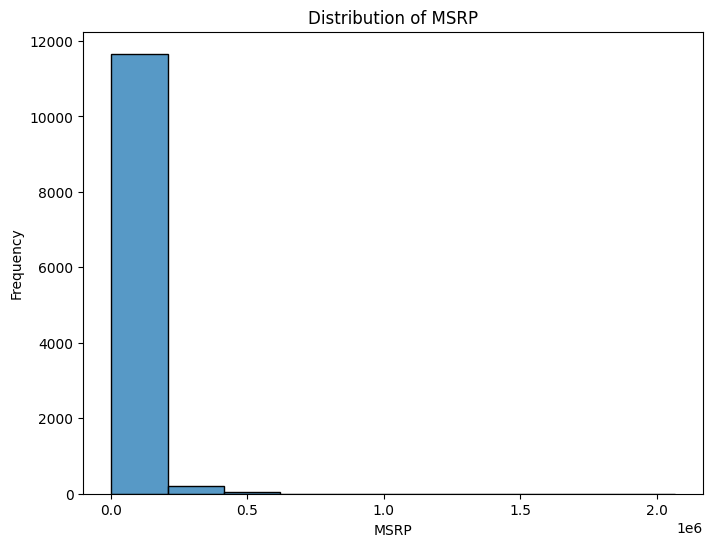

In [ ]:
# histogram
plt.figure(figsize=(8, 6))
sns.histplot(data['MSRP'], bins=10)
plt.title('Distribution of MSRP')
plt.xlabel('MSRP')
plt.ylabel('Frequency')
plt.show()

### Relationships Between Features:
- Are there correlations between the numerical variables?

- Are there features that are highly correlated (positively or negatively)?
- How does each feature correlate with the target variable?

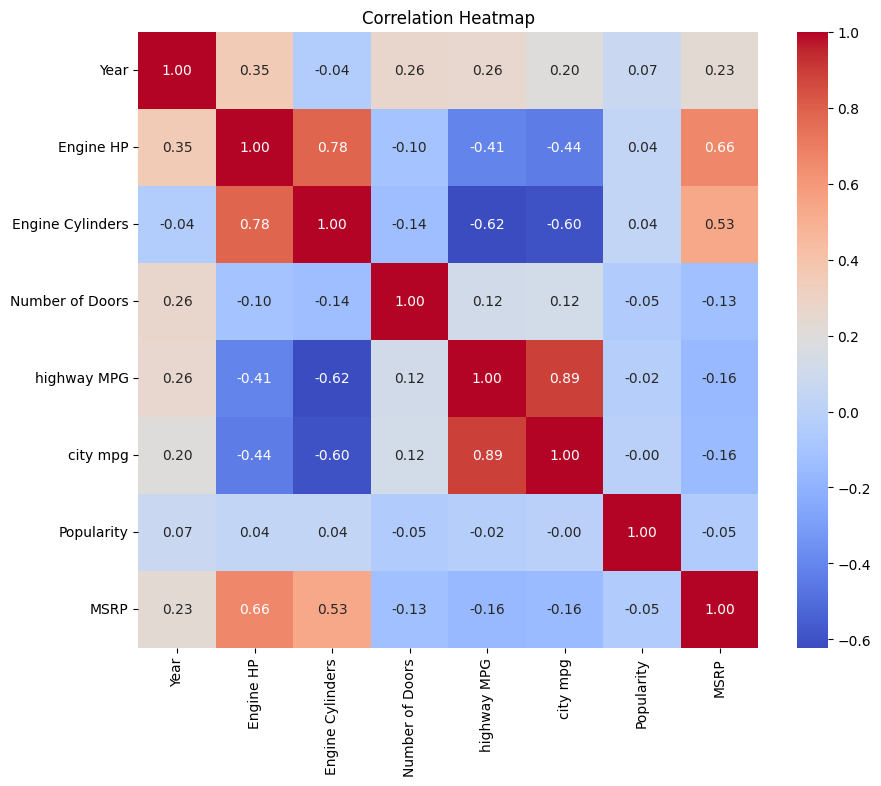

In [ ]:
# correlation heatmap
numerical_features = data.select_dtypes(include=[np.number])
correlation_matrix = numerical_features.corr()
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Correlation Heatmap")
plt.show()

### Are there any potential outliers in the dataset?
- Use boxplots or scatter plots to identify potential outliers.
- Should outliers be removed or dealt with in some other way?

<Axes: >

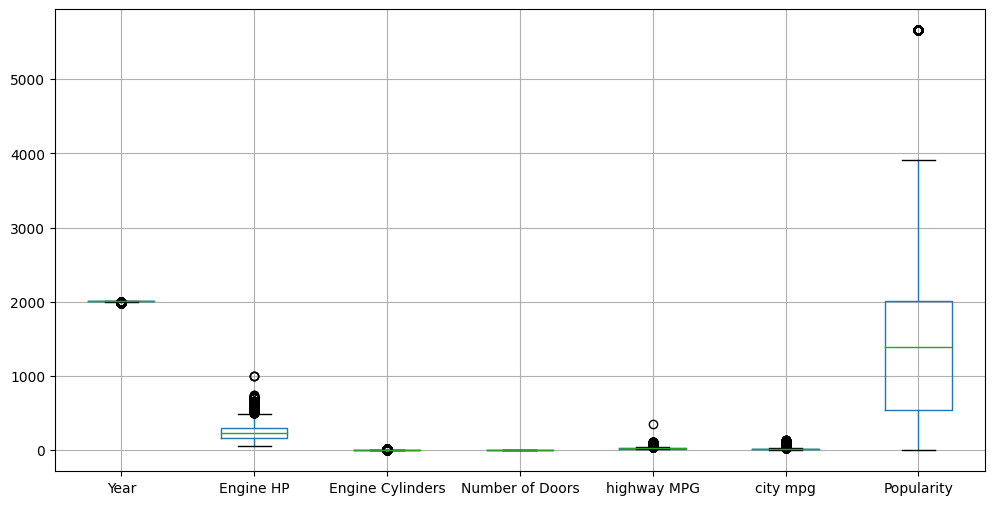

In [ ]:
# creating a boxplot of all numerical features except MSRP
numerical_features_boxplot = data.select_dtypes(include=[np.number])
numerical_features_boxplot = numerical_features.drop('MSRP', axis=1)
plt.figure(figsize=(12, 6))
numerical_features_boxplot.boxplot()

/usr/local/lib/python3.10/dist-packages/seaborn/categorical.py:640: FutureWarning: SeriesGroupBy.grouper is deprecated and will be removed in a future version of pandas.
  positions = grouped.grouper.result_index.to_numpy(dtype=float)


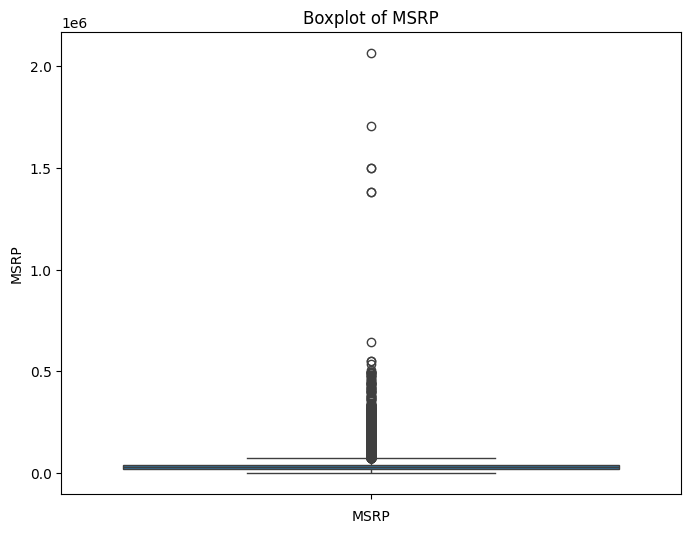

In [ ]:
#MSRP boxplot
plt.figure(figsize=(8, 6))
sns.boxplot(data['MSRP'])
plt.title('Boxplot of MSRP')
plt.xlabel('MSRP')
plt.show()

### Data Cleaning:
- Are there any issues in the data that need to be cleaned?

- Are there duplicated rows that should be removed?

In [ ]:
# removing duplicates
data.drop_duplicates(inplace=True)

In [ ]:
# removing outliers from MSRP using 1.5 x IQR
Q1 = data['MSRP'].quantile(0.25)
Q3 = data['MSRP'].quantile(0.75)
IQR = Q3 - Q1
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR
data = data[(data['MSRP'] >= lower_bound) & (data['MSRP'] <= upper_bound)]

In [ ]:
# removing outliers from Engine HP using 1.5 x IQR
Q1 = data['Engine HP'].quantile(0.25)
Q3 = data['Engine HP'].quantile(0.75)
IQR = Q3 - Q1
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR
data = data[(data['Engine HP'] >= lower_bound) & (data['Engine HP'] <= upper_bound)]

In [ ]:
# removing outliers from Popularity
Q1 = data['Popularity'].quantile(0.25)
Q3 = data['Popularity'].quantile(0.75)
IQR = Q3 - Q1
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR
data = data[(data['Popularity'] >= lower_bound) & (data['Popularity'] <= upper_bound)]


In [ ]:
# removing outliers from highway MPG
Q1 = data['highway MPG'].quantile(0.25)
Q3 = data['highway MPG'].quantile(0.75)
IQR = Q3 - Q1
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR
data = data[(data['highway MPG'] >= lower_bound) & (data['highway MPG'] <= upper_bound)]

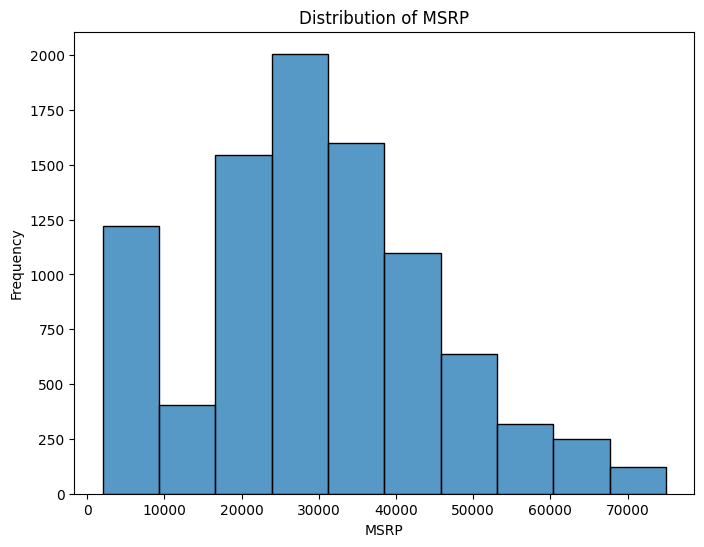

In [ ]:
#Checking new distribution
plt.figure(figsize=(8, 6))
sns.histplot(data['MSRP'], bins=10)
plt.title('Distribution of MSRP')
plt.xlabel('MSRP')
plt.ylabel('Frequency')
plt.show()

### Split into features and target

In [ ]:
X = data.drop('MSRP', axis=1)
y = data['MSRP']

### Feature Engineering

In [ ]:
data.head()

,Make,Model,Year,Engine Fuel Type,Engine HP,Engine Cylinders,Transmission Type,Driven_Wheels,Number of Doors,Market Category,Vehicle Size,Vehicle Style,highway MPG,city mpg,Popularity,MSRP
0,BMW,1 Series M,2011,premium unleaded (required),335.0,6.0,MANUAL,rear wheel drive,2.0,"Factory Tuner,Luxury,High-Performance",Compact,Coupe,26,19,3916,46135
1,BMW,1 Series,2011,premium unleaded (required),300.0,6.0,MANUAL,rear wheel drive,2.0,"Luxury,Performance",Compact,Convertible,28,19,3916,40650
2,BMW,1 Series,2011,premium unleaded (required),300.0,6.0,MANUAL,rear wheel drive,2.0,"Luxury,High-Performance",Compact,Coupe,28,20,3916,36350
3,BMW,1 Series,2011,premium unleaded (required),230.0,6.0,MANUAL,rear wheel drive,2.0,"Luxury,Performance",Compact,Coupe,28,18,3916,29450
4,BMW,1 Series,2011,premium unleaded (required),230.0,6.0,MANUAL,rear wheel drive,2.0,Luxury,Compact,Convertible,28,18,3916,34500


In [ ]:
# Identify numerical and categorical columns
numerical_features = X.select_dtypes(include=[np.number]).columns
categorical_features = X.select_dtypes(include=['object']).columns

### Preprocessing Pipelines

In [ ]:
#importing necessary libraries
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler, OneHotEncoder

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression, Ridge, Lasso, SGDRegressor
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.preprocessing import PolynomialFeatures


In [ ]:
# Preprocessing pipeline for numerical features
numerical_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='mean')),  # Handle missing values
    ('scaler', StandardScaler())  # Standardize features
])

# Preprocessing pipeline for categorical features
categorical_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='most_frequent')),  # Handle missing values
    ('onehot', OneHotEncoder(handle_unknown='ignore'))  # One-hot encoding
])

# Combine preprocessing for both numerical and categorical features
preprocessor = ColumnTransformer(transformers=[
    ('num', numerical_transformer, numerical_features),
    ('cat', categorical_transformer, categorical_features)
])

### Create a function to build and evaluate models using pipelines

In [ ]:

def evaluate_model(model, X_train, X_test, y_train, y_test):
    # Fit the model
    model.fit(X_train, y_train)

    # Predict on test set
    y_pred = model.predict(X_test)

    # Evaluation metrics
    mse = mean_squared_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)

    print(f"Model: {model.named_steps['model'].__class__.__name__}")
    print(f"Mean Squared Error: {mse:.4f}")
    print(f"R² Score: {r2:.4f}")
    print('-' * 50)

In [ ]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

### Model pipelines

In [ ]:
# Linear Regression Pipeline
linear_pipeline = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('model', LinearRegression())
])

# Ridge Regression Pipeline
ridge_pipeline = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('model', Ridge(alpha=1.0))
])

# Lasso Regression Pipeline
lasso_pipeline = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('model', Lasso(alpha=0.1))
])

# Stochastic Gradient Descent (SGD) Pipeline
sgd_pipeline = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('model', SGDRegressor(max_iter=1000, tol=1e-3))
])
# Polynomial Regression Pipeline (degree=2)
polynomial_pipeline = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('poly', PolynomialFeatures(degree=2)),
    ('model', LinearRegression())
])



### Evaluate all models

In [ ]:
for model in [linear_pipeline, ridge_pipeline, lasso_pipeline, sgd_pipeline, polynomial_pipeline]:
    evaluate_model(model, X_train, X_test, y_train, y_test)

Model: LinearRegression
Mean Squared Error: 12149822.6149
R² Score: 0.9522
--------------------------------------------------
Model: Ridge
Mean Squared Error: 13304584.9005
R² Score: 0.9476
--------------------------------------------------


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_coordinate_descent.py:658: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 28656434609.78988, tolerance: 186418248.10608718
  model = cd_fast.sparse_enet_coordinate_descent(


Model: Lasso
Mean Squared Error: 12281521.9064
R² Score: 0.9517
--------------------------------------------------


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_stochastic_gradient.py:1616: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(


Model: SGDRegressor
Mean Squared Error: 15925695.6358
R² Score: 0.9373
--------------------------------------------------
Model: LinearRegression
Mean Squared Error: 28068092.3684
R² Score: 0.8895
--------------------------------------------------


### Interpretation:
Discuss the effectiveness of each model. Which model performed the best and why?

The model that performed the best was the linear regression model. This could be because the linear relationship between the explanatory and response variables of MSRP was strong. 95.22% of the variability in MSRP could be explained by the explanatory variables. The MSE is also the lowest for the linear regression model. The polynomial model performed the worst, with only 89% of the variability being explained. It also had a much higher MSE than the other models. The other models performed very fairly in comparison to the linear regression model.

### Submission Requirements:

Submit your Jupyter notebook with the code for all models on Moodle using Github.
Include clear markdown cells explaining your approach, observations from EDA, preprocessing steps, and a detailed discussion of the results.